<a href="https://colab.research.google.com/github/Abhimokashe/Zomato_model_deploy/blob/main/zomato_india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns

import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Zomato_dataset.zip')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
df.shape

(51717, 17)

In [ ]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [ ]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df1 = df.copy()

In [ ]:
df1 = df1.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})
df1.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [ ]:
df1.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate             7775
votes               0
phone            1208
location           21
rest_type         227
dish_liked      28078
cuisines           45
cost              346
reviews_list        0
menu_item           0
type                0
city                0
dtype: int64

In [ ]:
df1 = df1.dropna(how='any')
df1.isnull().sum()

url             0
address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
phone           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [ ]:
df1.shape

(23193, 17)

In [ ]:
df1 = df1.drop(['url','phone'],axis=1)

**Cleaning Dataset**

In [ ]:
df1['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [ ]:
df1['cost'] = df1['cost'].apply(lambda x: x.replace(',',''))
df1['cost'] = df1['cost'].astype('float')

In [ ]:
df1['cost'].dtype

dtype('float64')

In [ ]:
df1['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
df1 = df1.loc[df1.rate!='NEW']   # Getting rid of 'NEW'

In [ ]:
df1['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
# Removing '/5' from rate
df1['rate'] = df1['rate'].apply(lambda x:x.replace('/5',''))

**Visualization**

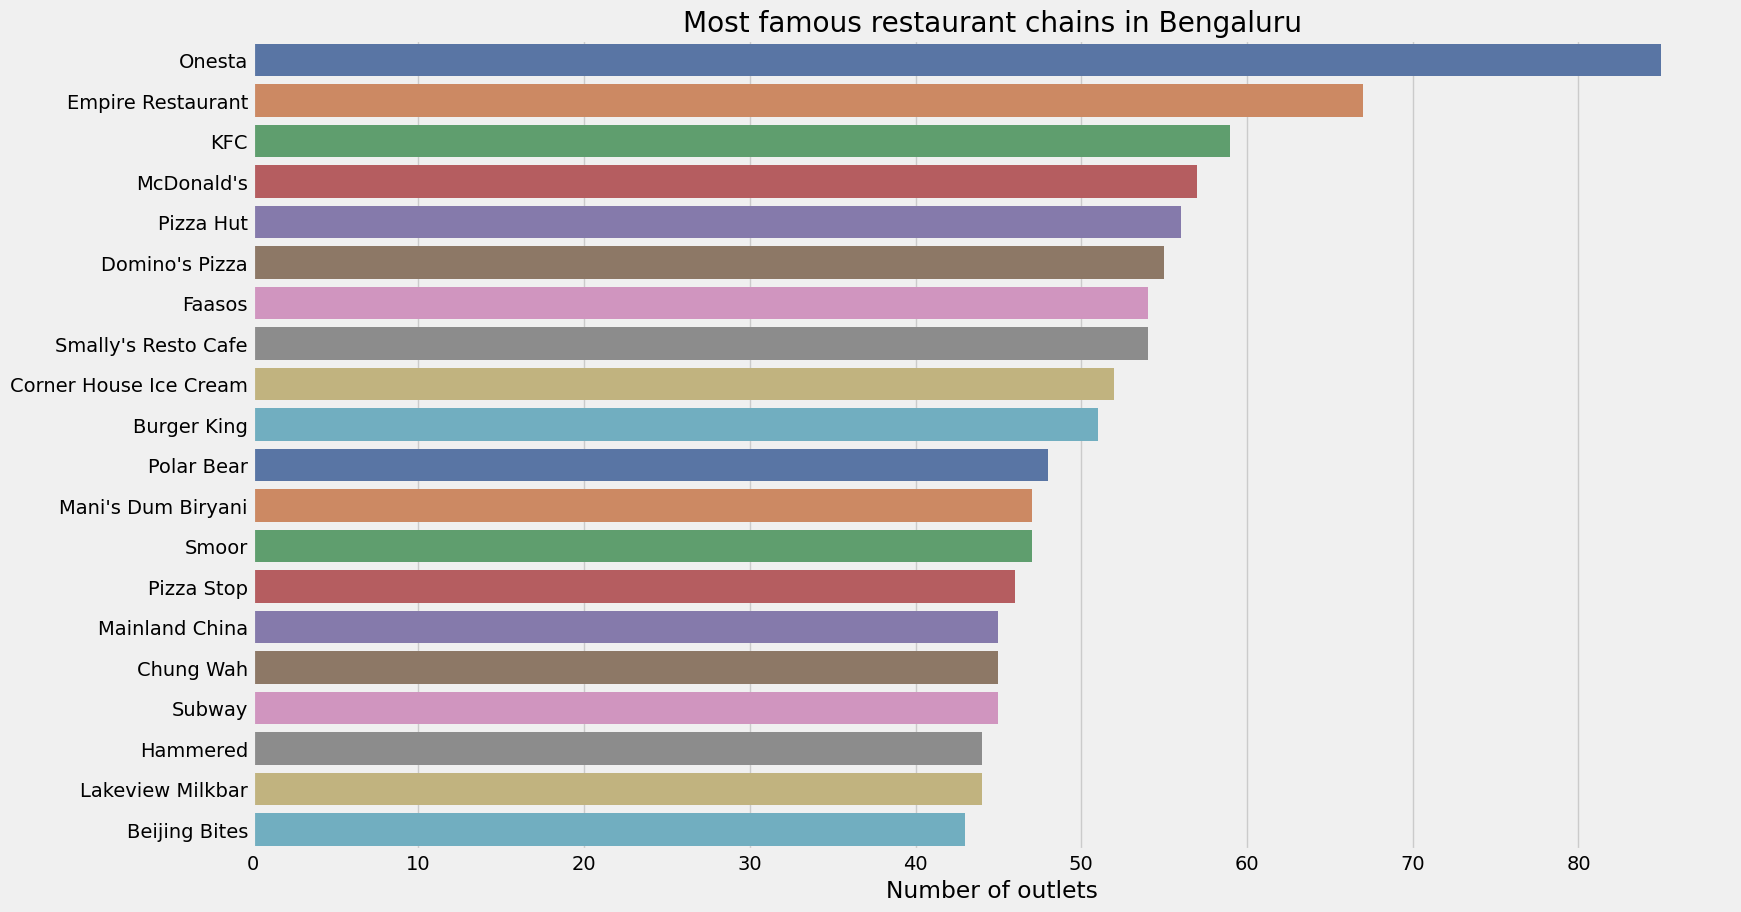

In [ ]:
plt.figure(figsize=(17,10))
chains = df1['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title('Most famous restaurant chains in Bengaluru')
plt.xlabel('Number of outlets')
plt.show()

In [ ]:
x = df1['book_table'].value_counts()
trace = go.Pie(labels=x.index,values=x,textinfo='value',marker=dict(line=dict(width=2)))

layout = go.Layout(title='Table booking',width=600,height=600)
fig = go.Figure(data=[trace],layout=layout)
py.iplot(fig,filename='pie_charts_subplots')

Most of the restaurants do not offer table booking.
 

Wheather restaurants deliver online or not

In [ ]:
df1['online_order'].value_counts()

Yes    16297
No      6749
Name: online_order, dtype: int64

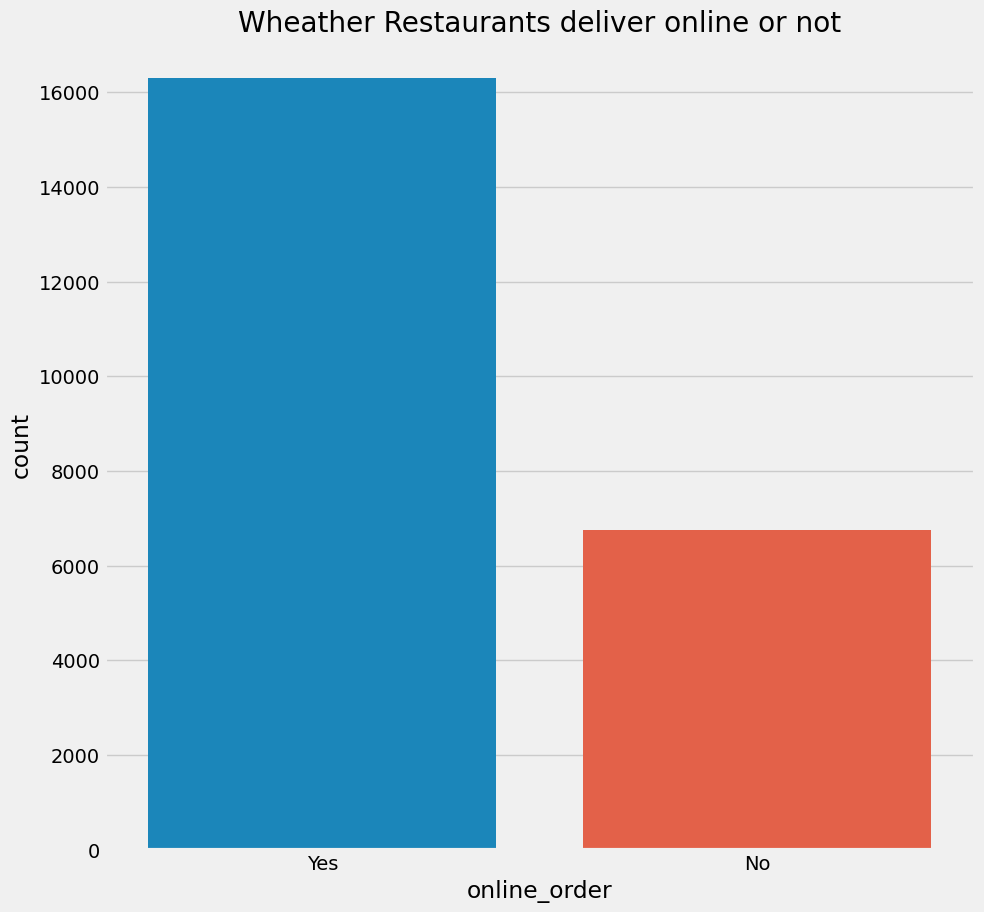

In [ ]:
# Restaurants delivering online or not.
sns.countplot(x=df1['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Wheather Restaurants deliver online or not')
plt.show()

Most of the restaurants offer option for online order and delivery.

**Rating Distributions**

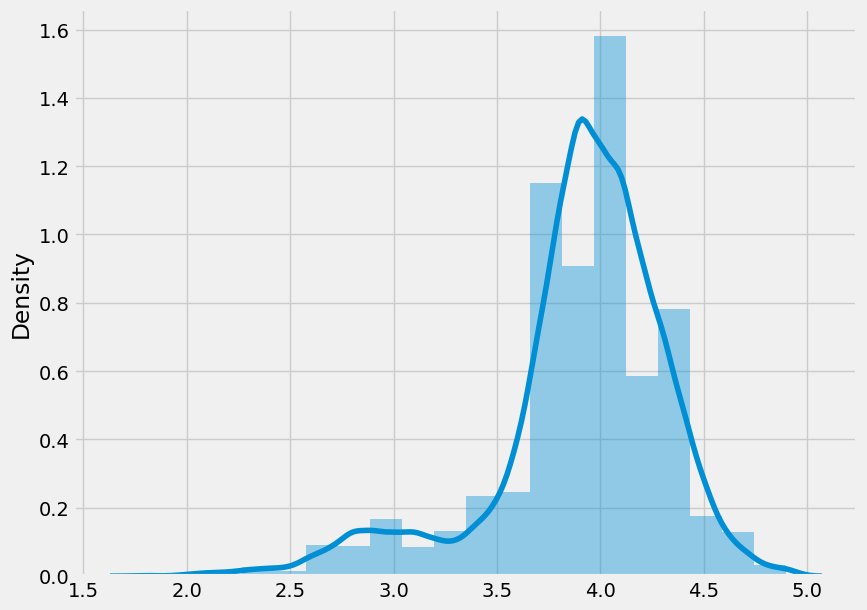

In [ ]:
# How ratings are distributed
plt.figure(figsize=(9,7))
sns.distplot(x=df1['rate'],bins=20)
plt.show()

Most of the ratings are within 3.5 and 4.5.

In [ ]:
df1['rate'].min()

'1.8'

In [ ]:
df1['rate'].max()

'4.9 '

In [ ]:
df1['rate'] = df1['rate'].astype('float')

In [ ]:
((df1['rate']>=1) & (df1['rate']<2)).sum()

5

In [ ]:
((df1['rate']>=2) & (df1['rate']<3)).sum()

1169

In [ ]:
((df1['rate']>=3) & df1['rate']<5).sum()

23046

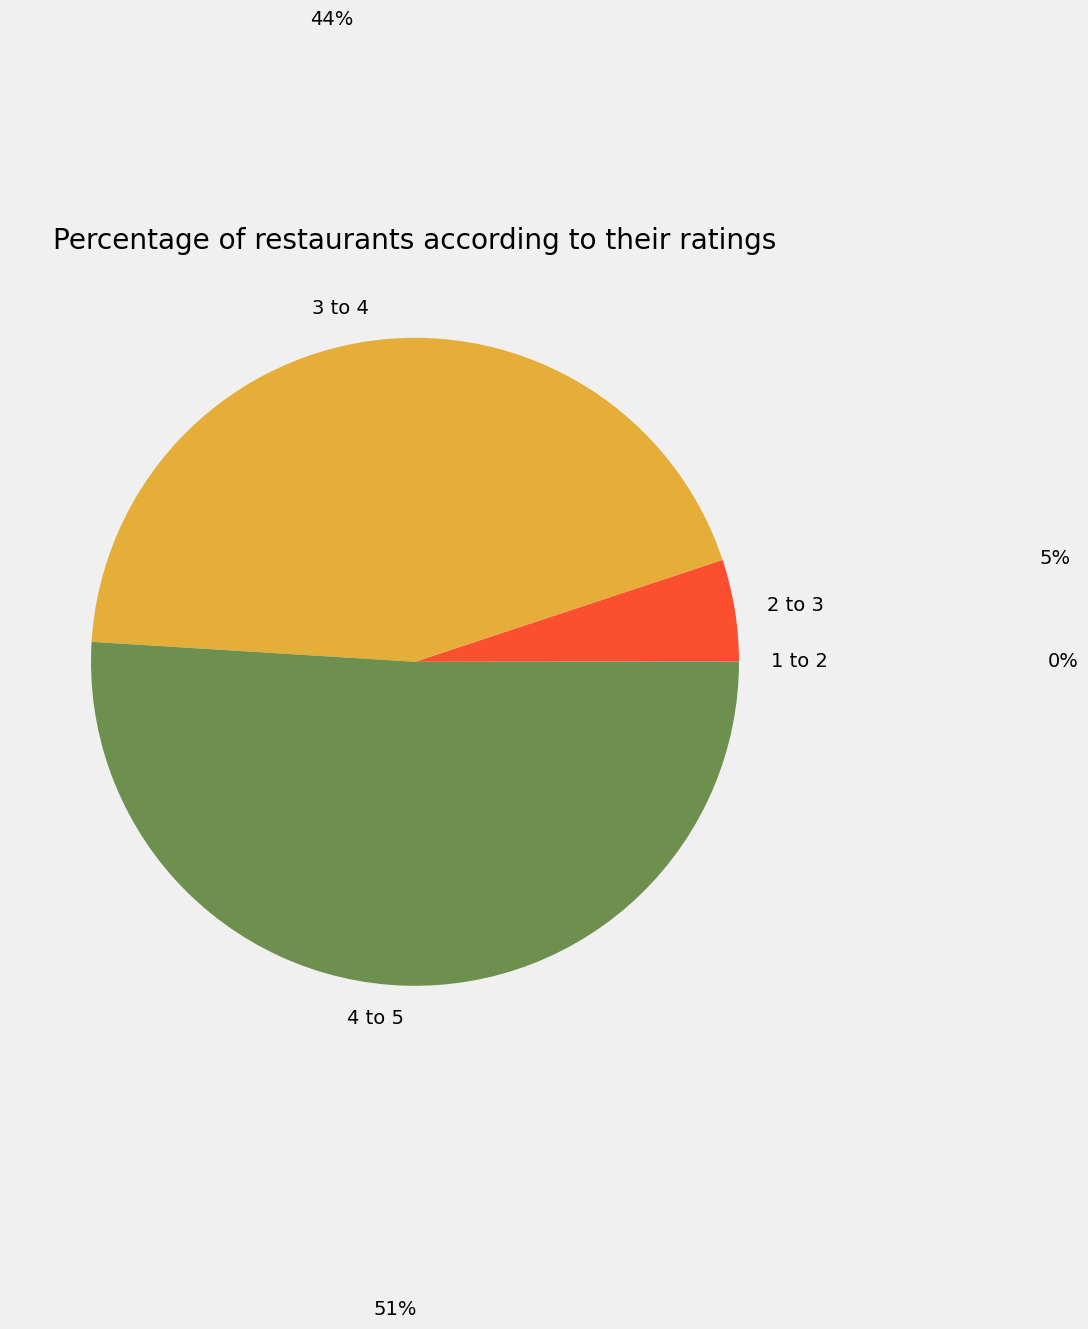

In [ ]:
slices= [((df1['rate']>=1) & (df1['rate']<2)).sum(),((df1['rate']>=2) & (df1['rate']<3)).sum(),((df1['rate']>=3) & (df1['rate']<4)).sum(),((df1['rate']>=4)).sum()]
labels = ['1 to 2','2 to 3','3 to 4','4 to 5']
plt.pie(slices,labels = labels,autopct='%1.0f%%',pctdistance=2)
fig = plt.gcf()
plt.title('Percentage of restaurants according to their ratings')
fig.set_size_inches(10,10)
plt.show()

Text(0.5, 1.0, 'Type of service')

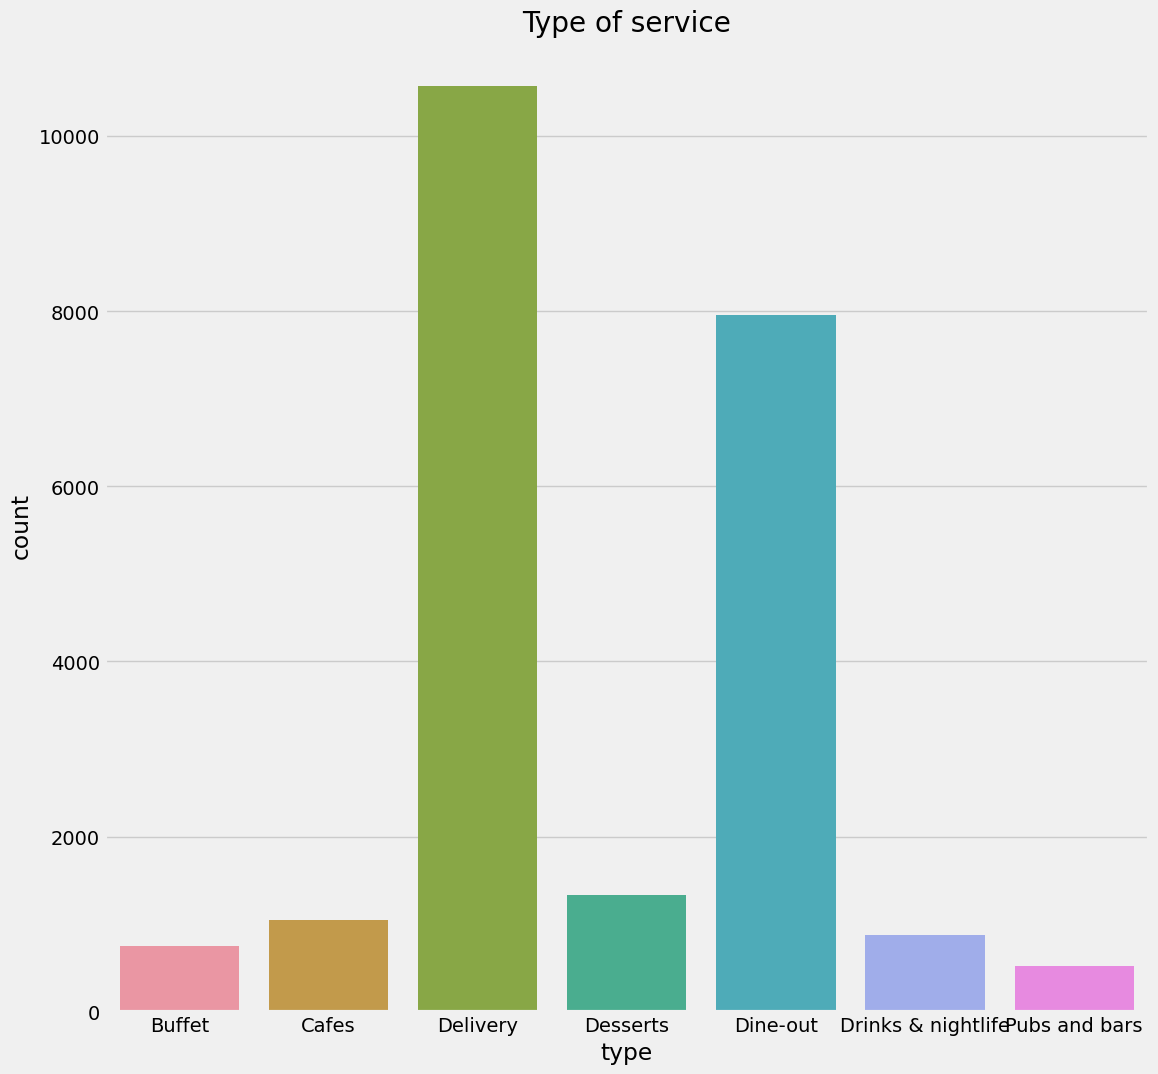

In [ ]:
sns.countplot(x=df1['type'])
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Type of service')

Here are two main services types are delivery and dine out.

**Distribution of Cost of food for two peoples**

In [ ]:
from plotly.offline import iplot
trace0 = go.Box(y=df1['cost'],name='accepting online orders')
data= [trace0]
layout = go.Layout(title='Box plot of approximate cost',width=800,height=800,yaxis=dict(title='Price'))
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

**Distribution of charges**

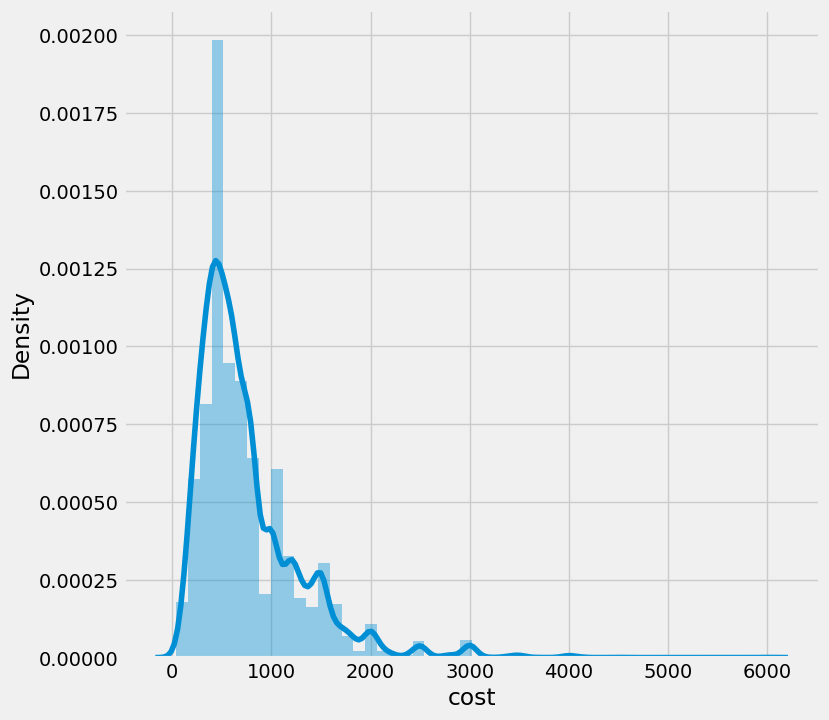

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(df1['cost'])
plt.show()

In [ ]:
import re

df1.index = range(df1.shape[0])
likes = []
for i in range (df1.shape[0]):
  array_split = re.split(',',df1['dish_liked'][i])
  for item in array_split:
    likes.append(item)

In [ ]:
df1.index = range(df1.shape[0])
df1.index

RangeIndex(start=0, stop=23046, step=1)

In [ ]:
print("count of most liked dishes in banglore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

count of most liked dishes in banglore


 Pasta              2650
 Pizza              1903
 Cocktails          1863
 Burgers            1724
 Mocktails          1585
 Biryani            1308
 Sandwiches         1281
Burgers             1239
 Coffee             1155
 Nachos             1153
 Fish               1116
 Paratha            1097
 Salads             1038
 Chicken Biryani    1002
Cocktails            891
 Fries               875
 Mutton Biryani      832
 Beer                827
 Noodles             821
 Tea                 800
 Sandwich            784
 Butter Chicken      783
Coffee               782
 Thali               770
Biryani              748
Pizza                736
 Roti                721
 Brownie             712
 Salad               678
 Hot Chocolate       667
dtype: int64

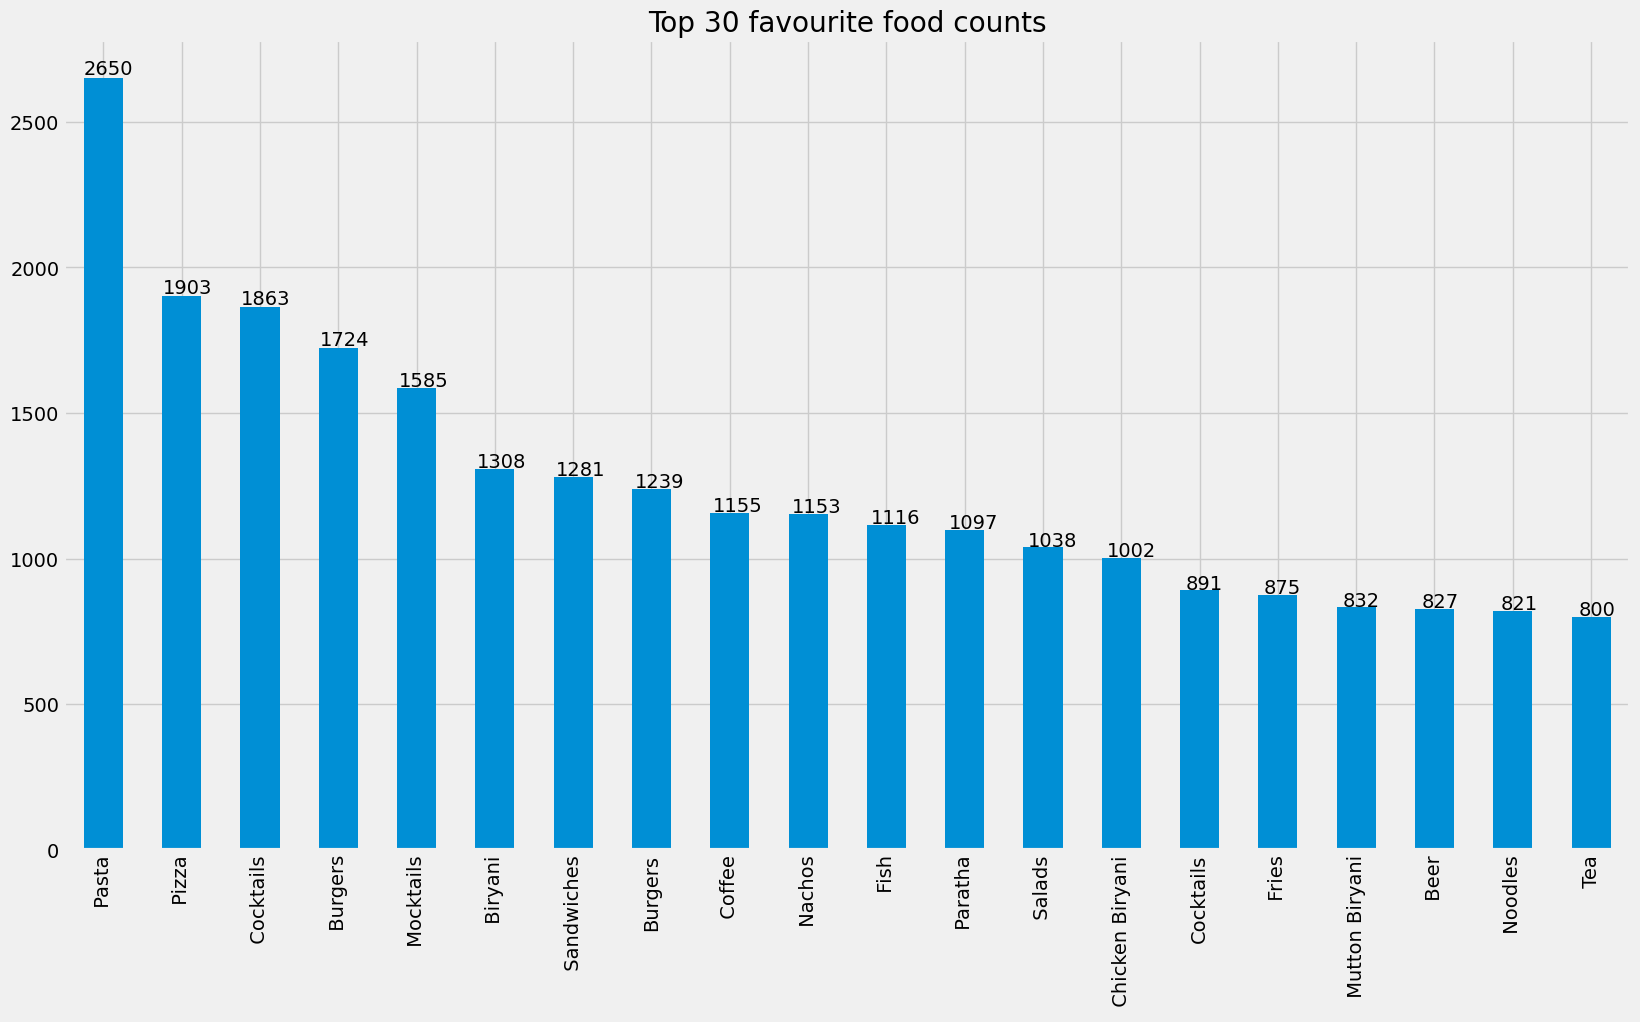

In [ ]:
ax = favourite_food.nlargest(n=20,keep='first').plot(kind='bar',figsize=(18,10),title='Top 30 favourite food counts')
for i in ax.patches:
  ax.annotate(str(i.get_height()),(i.get_x() * 1.005,i.get_height() * 1.005))

5 most liked dishes are pasta,pizza,cocktails,burgers,mocktails.

Text(0.5, 1.0, 'Restaurant')

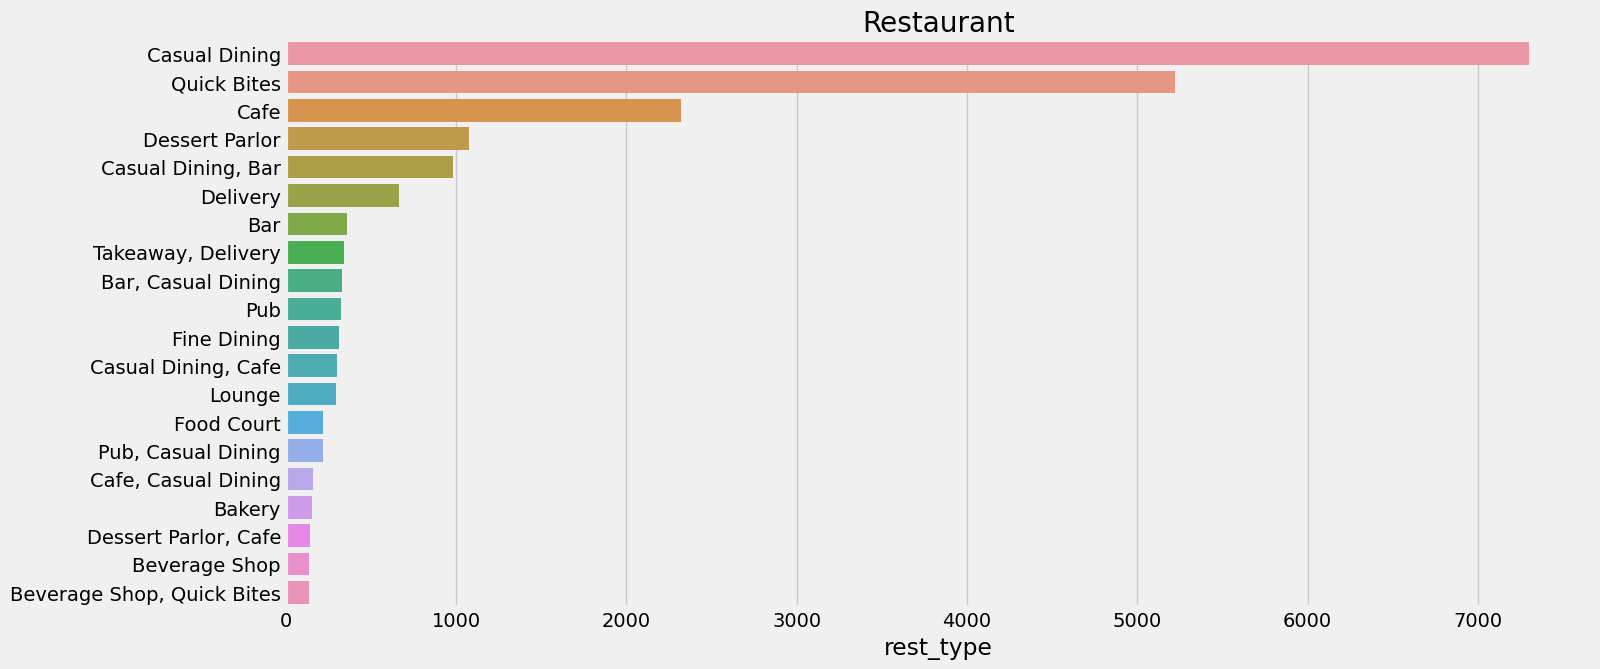

In [ ]:
plt.figure(figsize=(15,7))
rest = df1['rest_type'].value_counts()[:20]
sns.barplot(x=rest,y=rest.index)
plt.title('Restaurant')

Casual dining,Quick bites,cafe are 3 most commomn types of restaurants in Banglore.



# **Building model**

**Convert the online categorical variables into numerical format**

In [ ]:
df1.online_order[df1.online_order=='Yes'] = 1
df1.online_order[df1.online_order=='No'] = 0

In [ ]:
df1.online_order.value_counts()

1    16297
0     6749
Name: online_order, dtype: int64

In [ ]:
df1.online_order = pd.to_numeric(df1.online_order)

**Change the string categorical into a categorical int**

In [ ]:
df1.book_table[df1.book_table=='Yes'] = 1
df1.book_table[df1.book_table=='No'] = 0

In [ ]:
df1.book_table = pd.to_numeric(df1.book_table)

In [ ]:
df1.book_table.value_counts()

0    17005
1     6041
Name: book_table, dtype: int64

**Label Encode the categorical varibles to make it easier to build program.**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df1.location = le.fit_transform(df1.location)
df1.rest_type = le.fit_transform(df1.rest_type)
df1.cuisines = le.fit_transform(df1.cuisines)
df1.menu_item = le.fit_transform(df1.menu_item) 

In [ ]:
my_data = df1.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('Zomato_df1.csv')

In [ ]:
X = df1.iloc[:,[2,3,4,5,6,7,9,10,12]]
X.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,4.1,775,1,20,1382,800.0,5004
1,1,0,4.1,787,1,20,592,800.0,5004
2,1,0,3.8,918,1,16,482,800.0,5004
3,0,0,3.7,88,1,62,1583,300.0,5004
4,0,0,3.8,166,4,20,1402,600.0,5004


In [ ]:
y = df1['rate']
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23041    3.8
23042    3.9
23043    2.8
23044    2.5
23045    4.3
Name: rate, Length: 23046, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

# **Linear Regression**

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
y_pred = lr_model.predict(X_test)
r2_score(y_test,y_pred)

1.0

# **Random_Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_Model = RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(X_train,y_train)
y_predict = RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.9999894953690124

# **Extratree Regressor**

In [ ]:
!pip install sklearn.ensemble

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.ensemble (from versions: none)
ERROR: No matching distribution found for sklearn.ensemble


In [ ]:
# preparing extratree regression
#from sklearn.ensemble import ExtraTreeRegressor
#ET_model = ExtraTreeRegressor(n_estimators=120)
#ET_model.fit(X_train,y_train)
#y_predict = ET_model.predict(X_test)

In [ ]:
#from sklearn.metrics import r2_score
#r2_score(y_test,y_predict)

In [ ]:
# Use pickle to save our model so we can use it later.
import pickle
# Saving model to disk
pickle.dump(RF_Model,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))